In [19]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [20]:
im=cv2.imread('hitman.jpg')

In [21]:
orignal_shape = im.shape
print(im.shape)

(260, 462, 3)


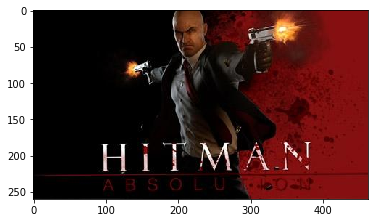

In [22]:
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [23]:
all_pixels = im.reshape((260*462,3))
print(all_pixels.shape)

(120120, 3)


In [24]:
from sklearn.cluster import KMeans

In [25]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
centers=km.cluster_centers_

In [27]:
centers = np.array(centers,dtype='uint8')

In [28]:
centers

array([[113,  15,  14],
       [  6,   2,   2],
       [217, 182, 159],
       [ 98,  75,  64]], dtype=uint8)

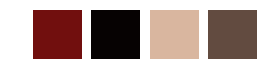

In [29]:
#plot colors

i=1
plt.figure(0,figsize=(4,2))

colors=[]
for each_color in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_color)
    #color swatch
    
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_color
    plt.imshow(a)
    
plt.show()    

In [30]:
#segmentation our original(hitman) image 

new_img = np.zeros((260*462,3),dtype='uint8')
new_img.shape

(120120, 3)

In [31]:
colors

[array([113,  15,  14], dtype=uint8),
 array([6, 2, 2], dtype=uint8),
 array([217, 182, 159], dtype=uint8),
 array([98, 75, 64], dtype=uint8)]

In [32]:
km.labels_

array([1, 1, 1, ..., 0, 0, 0])

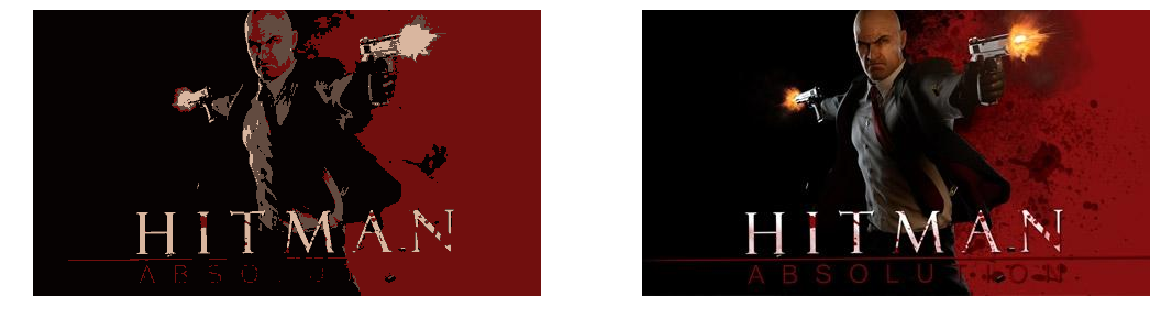

In [33]:
for ix in range (new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((orignal_shape))
#plt.imshow(new_img)
#plt.imshow(im)
#plt.show()

i=1
plt.figure(0,figsize=(20,10))
for img in [new_img,im]:
    plt.subplot(1,2,i)
    plt.axis("off")
    i+=1
    plt.imshow(img)
plt.show()
    
    
    
